In [1]:
import numpy as np
import pandas as pd # pip install Pyarrow
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

$$ f(x) = a \cdot x + b = w \cdot x + w_0 = \vec{w} \cdot \vec{x} + w_0 = (w_1, w_2, w_3, w_4, w_5, w_6) \cdot (x_1, x_2, x_3, x_4, x_5, x_6) + w_0 = w_1 \cdot x_1 + 
w_2 \cdot x_2 + w_3 \cdot x_3+ w_4 \cdot x_4 + w_5 \cdot x_5 + w_6 \cdot x_6 + w_0$$

In [19]:
# Load the real_estate.csv
df = pd.read_csv('real_estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [20]:
# Drop the ID (No) and geographic location (X5, X6) columns
df.drop('No', axis = 1, inplace = True)
df.drop('X5 latitude', axis = 1, inplace = True)
df.drop('X6 longitude', axis = 1, inplace = True)
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012.917,32.0,84.87882,10,37.9
1,2012.917,19.5,306.59470,9,42.2
2,2013.583,13.3,561.98450,5,47.3
3,2013.500,13.3,561.98450,5,54.8
4,2012.833,5.0,390.56840,5,43.1


In [21]:
# Extract y target values
y = df.pop('Y house price of unit area').to_list()

print(df.shape)
df.head()


(414, 4)


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores
0,2012.917,32.0,84.87882,10
1,2012.917,19.5,306.59470,9
2,2013.583,13.3,561.98450,5
3,2013.500,13.3,561.98450,5
4,2012.833,5.0,390.56840,5


In [22]:
# Create train and test set
X_train = df.values[::2]
X_test = df.values[1::2]

y_train = y[::2]
y_test = y[1::2]

In [24]:
X_test

array([[2.012917e+03, 1.950000e+01, 3.065947e+02, 9.000000e+00],
       [2.013500e+03, 1.330000e+01, 5.619845e+02, 5.000000e+00],
       [2.012667e+03, 7.100000e+00, 2.175030e+03, 3.000000e+00],
       [2.013417e+03, 2.030000e+01, 2.876025e+02, 6.000000e+00],
       [2.013417e+03, 1.790000e+01, 1.783180e+03, 3.000000e+00],
       [2.013333e+03, 6.300000e+00, 9.045606e+01, 9.000000e+00],
       [2.012667e+03, 2.040000e+01, 2.469645e+03, 4.000000e+00],
       [2.013583e+03, 3.570000e+01, 5.792083e+02, 2.000000e+00],
       [2.012750e+03, 1.770000e+01, 3.508515e+02, 1.000000e+00],
       [2.012667e+03, 1.500000e+00, 2.338284e+01, 7.000000e+00],
       [2.013417e+03, 1.050000e+01, 2.791726e+02, 7.000000e+00],
       [2.013083e+03, 1.010000e+01, 2.791726e+02, 7.000000e+00],
       [2.013083e+03, 2.930000e+01, 1.487868e+03, 2.000000e+00],
       [2.013250e+03, 1.040000e+01, 2.764490e+02, 5.000000e+00],
       [2.013083e+03, 7.100000e+00, 4.512438e+02, 5.000000e+00],
       [2.012750e+03, 2.9

In [26]:
lr = LinearRegression()                # Create sklearn Linear Regression object
train_model = lr.fit(X_train, y_train) # Do the regression

In [27]:
# Get the fitted weights
w0_estate = train_model.intercept_
w1_estate = train_model.coef_[0]
w2_estate = train_model.coef_[1]
w3_estate = train_model.coef_[2]
w4_estate = train_model.coef_[3]

print("w0 = " + str(w0_estate) + "  (constant term / intercept) ")
print("w1 = " + str(w1_estate) + "  (weight for X1 = transaction date)")
print("w2 = " + str(w2_estate) + "  (weight for X2 = house age)")
print("w3 = " + str(w3_estate) + "  (weight for X3 = distance to the nearest MRT station)")
print("w4 = " + str(w4_estate) + "  (weight for X4 = number of convenience stores)")

w0 = -10236.964304624633  (constant term / intercept) 
w1 = 5.10732999548235  (weight for X1 = transaction date)
w2 = -0.24294750165839452  (weight for X2 = house age)
w3 = -0.0057288105270655865  (weight for X3 = distance to the nearest MRT station)
w4 = 1.0739765385822435  (weight for X4 = number of convenience stores)


Let's interpret the meaning of the coefficients! 
- first of all, w1/w2/w3/w4 mean that if there's a unit change in X1/X2/X3/X4 then there's a w1/w2/w3/w4 change in y, so:
    - __w1__ means that if there's a 1 year difference in the transaction data, the house price of unit area increases with 5.107 (this shows that the house prices go up, so it was cheaper to buy a house last year than this year)
    - __w2__ means that if the house is 1 year older, the house price of unit area decreases with 0.243 (absolutely logical, the older the house, the cheaper it will sell)
    - __w3__ means that if the closest MRT station is 1 meter further, the house price of unit are decreases with 0.0057 (understandable, hence the further the closest MRT station is, the more we have to walk, the less we want to pay for the lack of comfort)
    - __w4__ means that if there's 1 more convenience store, then the house price of unit area increases with 1.073 (again, it's really logical, if there are more convenience stores nearby, the more comfort it provides, the more we are willing to pay for the house)
- __w0__, the intercept term mean that if every X1/X2/X3/X4 data are 0, then the house price of unit area would be -10236.96, which makes no sense! However, for instance, X1 being 0 (a.k.a. the transaction date being 0) makes no sense at all as well, so I think that's why this w0 intercept term makes no sense in real life.

Test the fitted model! Let's do predictions, and plot the prediction and the residual plots!

In [29]:
# Do predictions
prediction_test  = lr.predict(X_test)

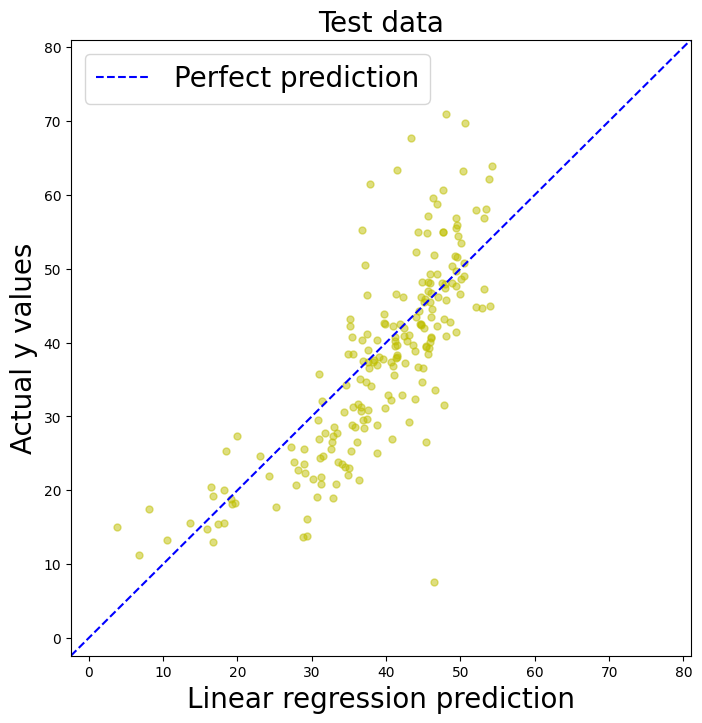

In [31]:
plt.figure(figsize=(8, 8))

plt.plot(prediction_test, y_test, "yo", markersize = 5, alpha = 0.5)
plt.xlim(np.min(y_test) - 10, np.max(y_test) + 10)
plt.ylim(np.min(y_test) - 10, np.max(y_test) + 10)
plt.xlabel('Linear regression prediction', fontsize = 20)
plt.ylabel('Actual y values', fontsize = 20)
plt.title('Test data', fontsize = 20)
plt.plot([np.min(y_test) - 10, np.max(y_test) + 10], [np.min(y_test) - 10, np.max(y_test) + 10], 
            '--', color = 'blue', label='Perfect prediction')
plt.legend(fontsize = 20)


plt.show()